In [95]:
# Import Needed Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Obtaining time_series from kahn based on lemmitize sentiment score

In [3]:
df = pd.read_csv('time_series.csv', index_col=0)
df.head()

,date,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.0000
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.9313
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.5859
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.0000
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",-0.3400


In [5]:
# change date column to datetime format
df.date = pd.to_datetime(df.date, utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   date       517401 non-null  datetime64[ns, UTC]
 1   sentiment  517401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 11.8 MB


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516182 entries, 1999-01-04 10:21:00+00:00 to 2002-12-21 08:24:45+00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sentiment  516182 non-null  float64
 1   year       516182 non-null  int64  
 2   month      516182 non-null  int64  
 3   day        516182 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 19.7 MB


In [72]:
df.isnull().sum()

sentiment    0
year         0
month        0
day          0
dtype: int64

In [6]:
# Set index at date columnad and sort index
df = df.set_index("date").sort_index()
df.head()

,sentiment
date,
1980-01-01 00:00:00+00:00,0.6124
1980-01-01 00:00:00+00:00,0.0000
1980-01-01 00:00:00+00:00,0.9979
1980-01-01 00:00:00+00:00,0.7964
1980-01-01 00:00:00+00:00,0.8126


In [7]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

,sentiment,year,month,day
date,,,,
1980-01-01 00:00:00+00:00,0.6124,1980,1,1
1980-01-01 00:00:00+00:00,0.0000,1980,1,1
1980-01-01 00:00:00+00:00,0.9979,1980,1,1
1980-01-01 00:00:00+00:00,0.7964,1980,1,1
1980-01-01 00:00:00+00:00,0.8126,1980,1,1


In [9]:
# Neautral Scores
df[df.sentiment == 0].count()

sentiment    45685
year         45685
month        45685
day          45685
dtype: int64

In [10]:
# Positive Scores
df[df.sentiment > 0].count()

sentiment    430958
year         430958
month        430958
day          430958
dtype: int64

In [16]:
df[df.sentiment > 0]

,sentiment,year,month,day
date,,,,
1980-01-01 00:00:00+00:00,0.6124,1980,1,1
1980-01-01 00:00:00+00:00,0.9979,1980,1,1
1980-01-01 00:00:00+00:00,0.7964,1980,1,1
1980-01-01 00:00:00+00:00,0.8126,1980,1,1
1980-01-01 00:00:00+00:00,0.9628,1980,1,1
...,...,...,...,...
2012-11-28 04:47:24+00:00,0.4019,2012,11,28
2020-12-29 20:53:46+00:00,0.9812,2020,12,29
2024-05-26 10:49:57+00:00,0.9639,2024,5,26


In [11]:
# Negative Scores
df[df.sentiment < 0].count()

sentiment    40758
year         40758
month        40758
day          40758
dtype: int64

In [17]:
# Negative Scores
df[df.sentiment < 0]

,sentiment,year,month,day
date,,,,
1980-01-01 00:00:00+00:00,-0.3400,1980,1,1
1980-01-01 00:00:00+00:00,-0.3400,1980,1,1
1980-01-01 00:00:00+00:00,-0.8809,1980,1,1
1980-01-01 00:00:00+00:00,-0.2960,1980,1,1
1980-01-01 00:00:00+00:00,-0.1406,1980,1,1
...,...,...,...,...
2002-07-12 08:31:00+00:00,-0.2023,2002,7,12
2002-07-12 08:31:00+00:00,-0.2023,2002,7,12
2002-07-12 08:31:00+00:00,-0.2023,2002,7,12


In [20]:
# years beyond 2002? why is 2044 and 2020 there?
df[df.year > 2002].year

date
2004-02-03 23:39:00+00:00    2004
2004-02-03 23:52:26+00:00    2004
2004-02-03 23:52:39+00:00    2004
2004-02-04 00:39:33+00:00    2004
2004-02-04 00:43:10+00:00    2004
                             ... 
2024-05-26 10:49:57+00:00    2024
2043-12-28 19:34:12+00:00    2043
2044-01-02 23:46:00+00:00    2044
2044-01-04 16:59:46+00:00    2044
2044-01-04 22:48:58+00:00    2044
Name: year, Length: 81, dtype: int64

In [ ]:
# No 2003 but there is 2004?

In [22]:
df[df.year == 2004].year.count()

70

In [23]:
df[df.year == 2005].year.count()

1

In [39]:
df[df.year == 2007].year.count()

1

In [42]:
df[df.year == 2012].year.count()

2

In [41]:
df[df.year > 2012].year.count()

7

In [37]:
df[df.year > 2007].year.count()

9

In [26]:
df[df.year == 2043].year.count()

1

In [27]:
df[df.year == 2044].year.count()

3

In [44]:
### Lets remove dates before 2004? acutally lets do it before 2003 since the collapse happened around 2002!

df = df[df.year < 2003]
df.head()

,sentiment,year,month,day
date,,,,
1980-01-01 00:00:00+00:00,0.6124,1980,1,1
1980-01-01 00:00:00+00:00,0.0000,1980,1,1
1980-01-01 00:00:00+00:00,0.9979,1980,1,1
1980-01-01 00:00:00+00:00,0.7964,1980,1,1
1980-01-01 00:00:00+00:00,0.8126,1980,1,1


In [48]:
df.shape

(517320, 4)

In [51]:
df[df.year < 1998].count()

sentiment    961
year         961
month        961
day          961
dtype: int64

In [52]:
df = df[df.year > 1998]

In [53]:
df.shape

(516182, 4)

# Exploring the data!

In [ ]:
# Tying to explore our time series, bit more of a trend line a I see but still messy need to clean (aggregate the data)

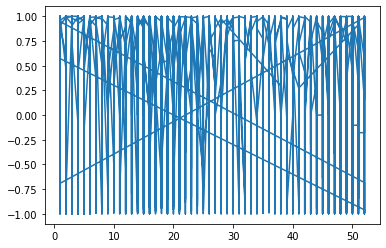

In [56]:
plt.plot(df.index.week, df.sentiment)

## lets split the data and see if that changes anything by the years?

## Human Splitting version here!

In [58]:
train = df[df.year < 2002]
test = df[df.year == 2002]

In [68]:
train.index

DatetimeIndex(['1999-01-04 10:21:00+00:00', '1999-01-04 10:21:00+00:00',
               '1999-01-04 12:11:00+00:00', '1999-01-04 12:11:00+00:00',
               '1999-01-05 06:36:00+00:00', '1999-01-05 06:36:00+00:00',
               '1999-01-05 12:04:00+00:00', '1999-01-05 12:04:00+00:00',
               '1999-01-05 14:54:00+00:00', '1999-01-05 14:54:00+00:00',
               ...
               '2001-12-31 23:08:03+00:00', '2001-12-31 23:09:55+00:00',
               '2001-12-31 23:26:05+00:00', '2001-12-31 23:32:42+00:00',
               '2001-12-31 23:35:12+00:00', '2001-12-31 23:37:14+00:00',
               '2001-12-31 23:37:39+00:00', '2001-12-31 23:40:00+00:00',
               '2001-12-31 23:52:05+00:00', '2001-12-31 23:52:49+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=480208, freq=None)

In [64]:
train.head()

,sentiment,year,month,day
date,,,,
1999-01-04 10:21:00+00:00,0.2023,1999,1,4
1999-01-04 10:21:00+00:00,0.2023,1999,1,4
1999-01-04 12:11:00+00:00,0.3182,1999,1,4
1999-01-04 12:11:00+00:00,0.3182,1999,1,4
1999-01-05 06:36:00+00:00,0.9940,1999,1,5


In [ ]:
# Ploting traget variable over time (with train data)

In [69]:
#using train data
by_date = train.groupby(['date']).sentiment.sum().reset_index()
by_date.head()

,date,sentiment
0,1999-01-04 10:21:00+00:00,0.4046
1,1999-01-04 12:11:00+00:00,0.6364
2,1999-01-05 06:36:00+00:00,1.9880
3,1999-01-05 12:04:00+00:00,1.9396
4,1999-01-05 14:54:00+00:00,1.8626


<AxesSubplot:xlabel='date'>

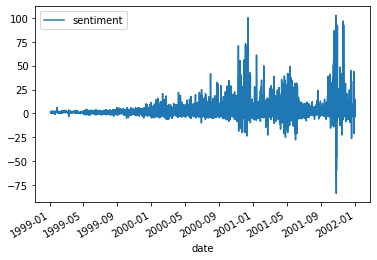

In [70]:
#using train data
by_date.plot(x = 'date', y = 'sentiment')

In [ ]:
# really looking at our train and test data now

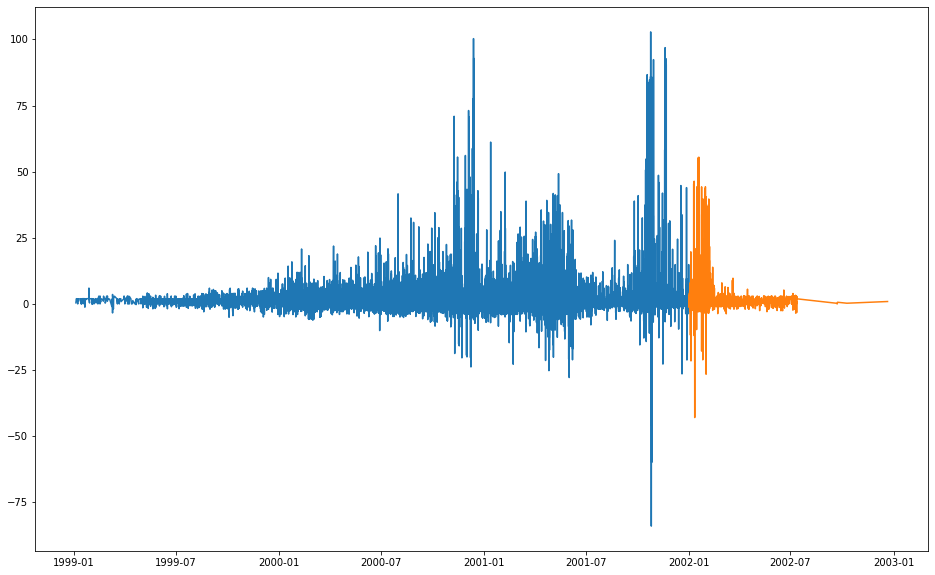

In [75]:
train_by_date = train.groupby(['date']).sentiment.sum().reset_index()
#train_by_date.plot(x = 'date', y = 'sentiment')


test_by_date = test.groupby(['date']).sentiment.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

plt.figure(figsize = (16, 10))
plt.plot(train_by_date.date, train_by_date.sentiment)
plt.plot(test_by_date.date, test_by_date.sentiment)
plt.show()

# Cross validated instead of human splitting

In [77]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
tscv = TimeSeriesSplit(n_splits)

In [78]:
for train_index, test_index in tscv.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(f"Length of TRAIN: {len(train_index)}", f"Length of TEST: {len(test_index)}", "\n")

TRAIN: [    0     1     2 ... 86029 86030 86031] TEST: [ 86032  86033  86034 ... 172059 172060 172061]
Length of TRAIN: 86032 Length of TEST: 86030 

TRAIN: [     0      1      2 ... 172059 172060 172061] TEST: [172062 172063 172064 ... 258089 258090 258091]
Length of TRAIN: 172062 Length of TEST: 86030 

TRAIN: [     0      1      2 ... 258089 258090 258091] TEST: [258092 258093 258094 ... 344119 344120 344121]
Length of TRAIN: 258092 Length of TEST: 86030 

TRAIN: [     0      1      2 ... 344119 344120 344121] TEST: [344122 344123 344124 ... 430149 430150 430151]
Length of TRAIN: 344122 Length of TEST: 86030 

TRAIN: [     0      1      2 ... 430149 430150 430151] TEST: [430152 430153 430154 ... 516179 516180 516181]
Length of TRAIN: 430152 Length of TEST: 86030 



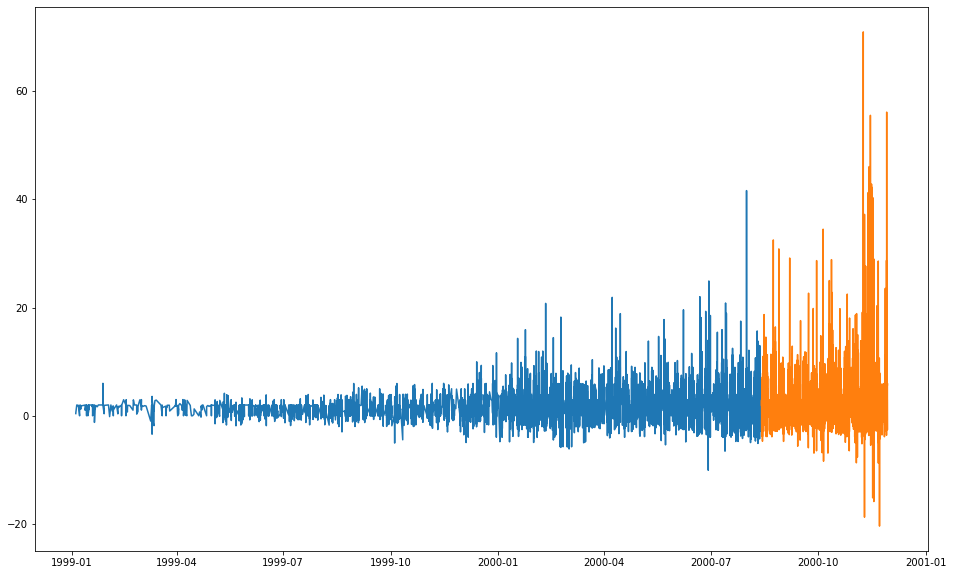

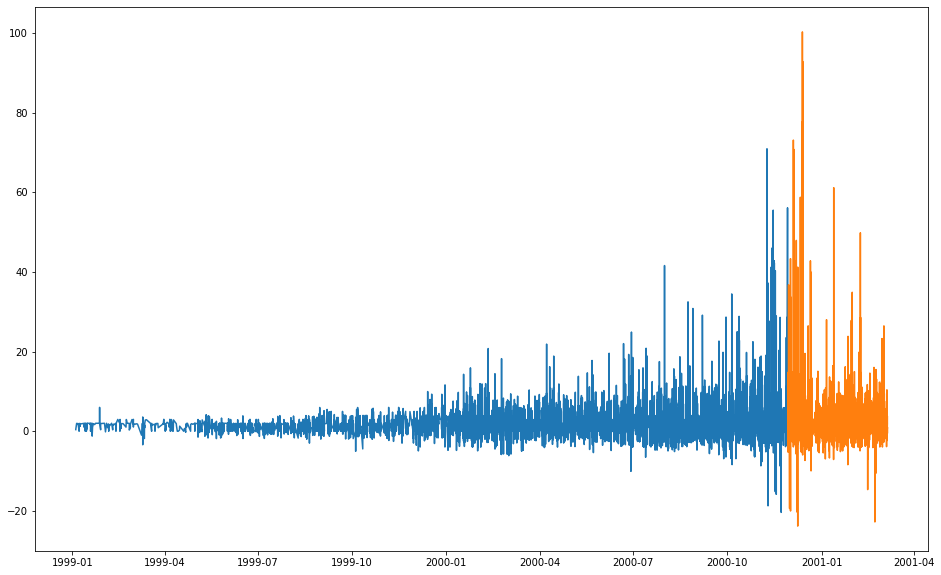

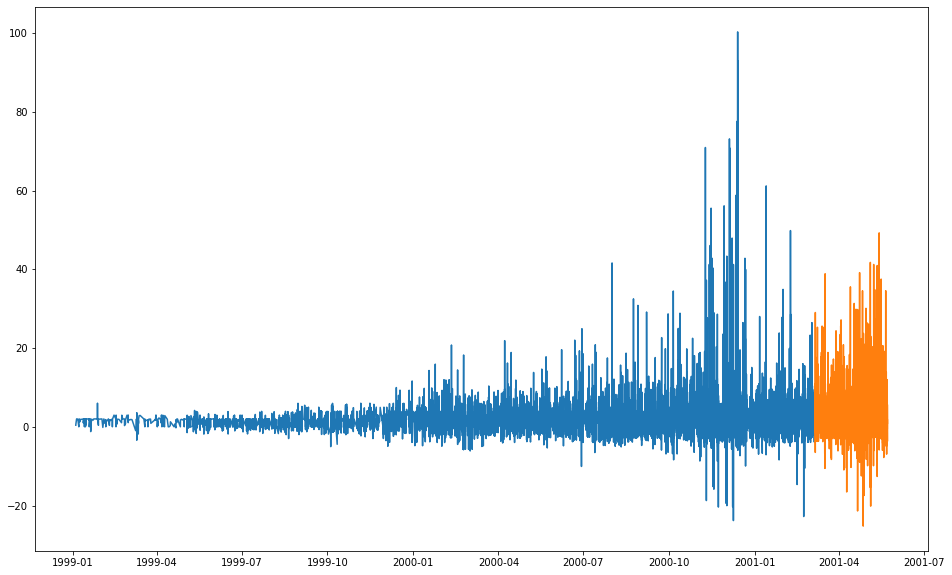

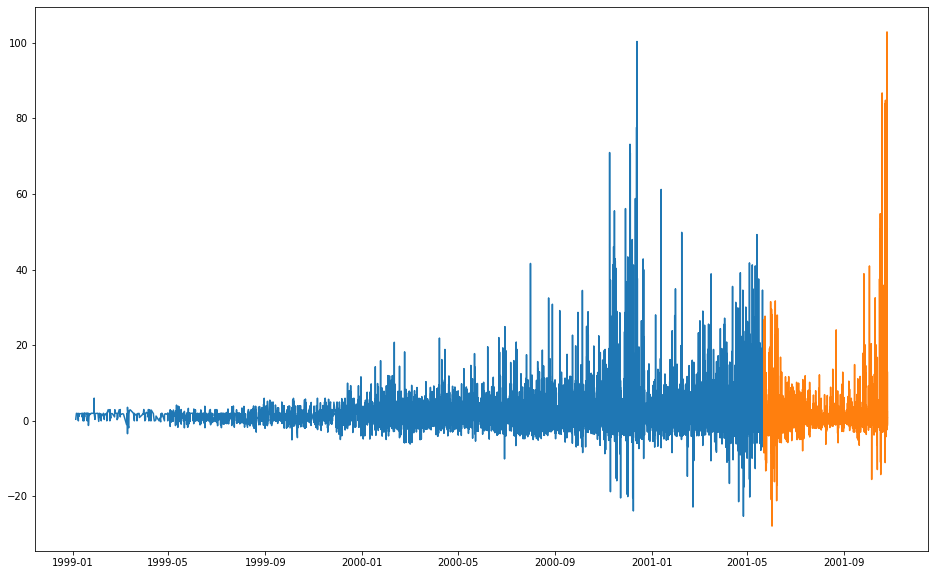

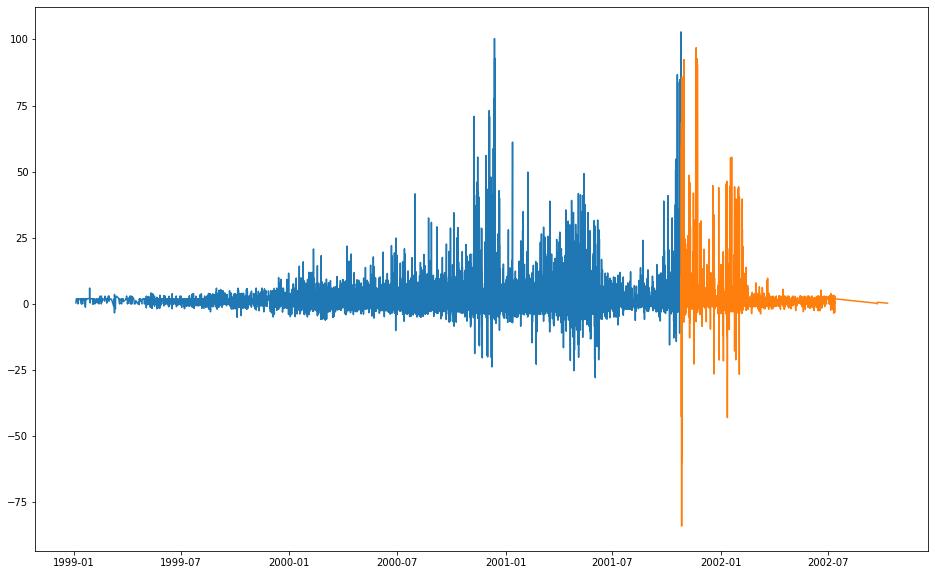

In [81]:
for train_index, test_index in tscv.split(df):
    train = df[:train_index[-1]]
    test = df[test_index[0]:test_index[-1]]

    train_by_date = train.groupby(['date']).sentiment.sum().reset_index()
    #train_by_date.plot(x='sale_date', y='sale_amount')

    test_by_date = test.groupby(['date']).sentiment.sum().reset_index()
    #test_by_date.plot(x='sale_date', y='sale_amount')

    plt.figure(figsize = (16, 10))
    plt.plot(train_by_date.date, train_by_date.sentiment)
    plt.plot(test_by_date.date, test_by_date.sentiment)
    plt.show()

In [82]:
train.shape

(430151, 4)

In [83]:
test.shape

(86029, 4)

In [84]:
train.tail()

,sentiment,year,month,day
date,,,,
2001-10-25 14:42:39+00:00,0.9332,2001,10,25
2001-10-25 14:42:58+00:00,0.2960,2001,10,25
2001-10-25 14:42:58+00:00,0.2960,2001,10,25
2001-10-25 14:44:11+00:00,0.5994,2001,10,25
2001-10-25 14:44:43+00:00,0.9877,2001,10,25


In [85]:
test.tail()

,sentiment,year,month,day
date,,,,
2002-09-19 19:59:09+00:00,0.2960,2002,9,19
2002-09-20 22:04:12+00:00,0.2960,2002,9,20
2002-09-22 16:42:25+00:00,0.0000,2002,9,22
2002-09-23 04:01:33+00:00,0.6369,2002,9,23
2002-10-09 21:20:21+00:00,0.2732,2002,10,9


In [86]:
train.head()

,sentiment,year,month,day
date,,,,
1999-01-04 10:21:00+00:00,0.2023,1999,1,4
1999-01-04 10:21:00+00:00,0.2023,1999,1,4
1999-01-04 12:11:00+00:00,0.3182,1999,1,4
1999-01-04 12:11:00+00:00,0.3182,1999,1,4
1999-01-05 06:36:00+00:00,0.9940,1999,1,5


In [93]:
test.head()

,sentiment,year,month,day
date,,,,
2001-10-25 14:44:55+00:00,0.9951,2001,10,25
2001-10-25 14:44:55+00:00,0.9951,2001,10,25
2001-10-25 14:44:55+00:00,0.9951,2001,10,25
2001-10-25 14:44:55+00:00,0.9951,2001,10,25
2001-10-25 14:45:12+00:00,0.6542,2001,10,25


###  Looking at this we can see that the date stops around 2001 10 25 at *14:44:55* where the train stops the same date but the time stops at *14:44:43* dont know if this will be an issue so bring up with the team?

# Now we know how to split lets look at all the date with the months and see if we can identify things

{'whiskers': [<matplotlib.lines.Line2D at 0x1779059c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1779059cb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1779059df60>],
 'medians': [<matplotlib.lines.Line2D at 0x1779059f760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1779059f250>],
 'means': []}

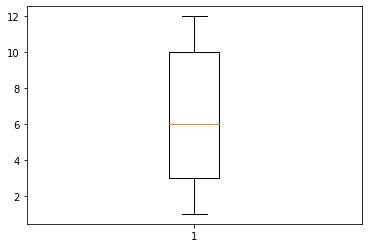

In [97]:
plt.boxplot(data = df, x ='month')

In [98]:
y = df.sentiment

<AxesSubplot:xlabel='date'>

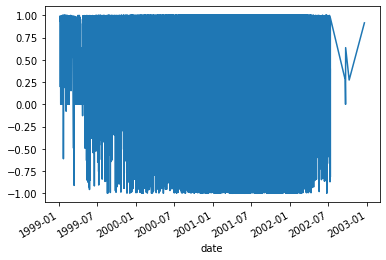

In [101]:
y.plot()

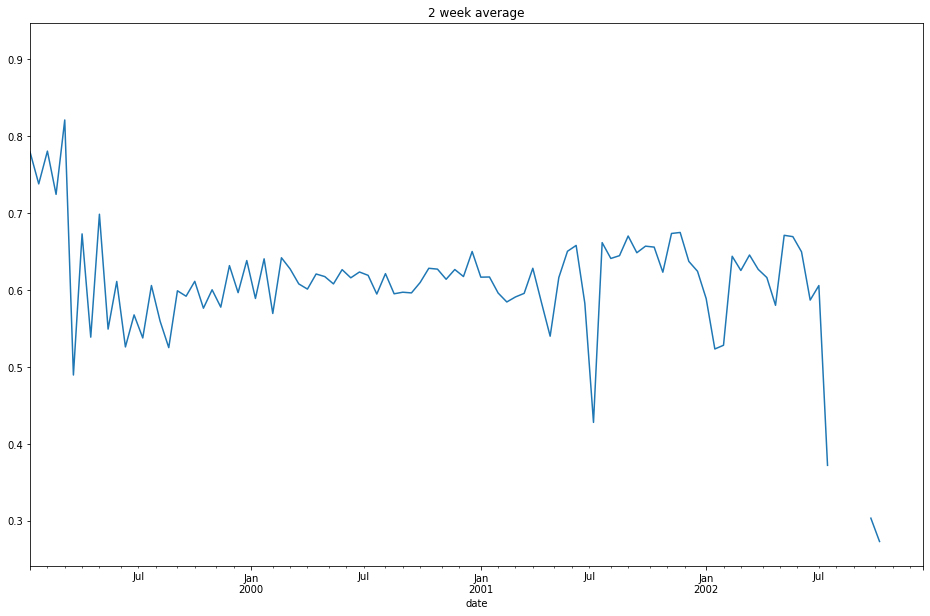

In [103]:
plt.figure(figsize =(16,10))
y.resample('2W').mean().plot(title='2 week average');

*Cut off in July to Oct through november??

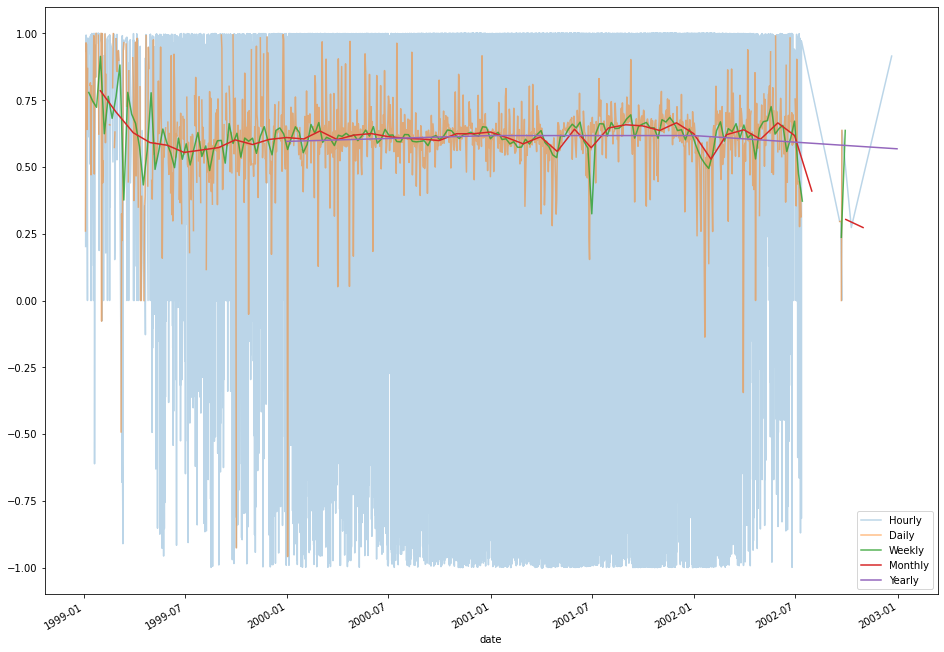

In [105]:
plt.figure(figsize = (16, 12))
ax = y.plot(alpha=.3, label='Hourly')
y.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
y.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
y.resample('M').mean().plot(ax=ax, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

# We can see little dips in 2001 and 2002 monthly
# We can See a big daily dip in 2000?
# We can see big dip in 2001 weekly before july

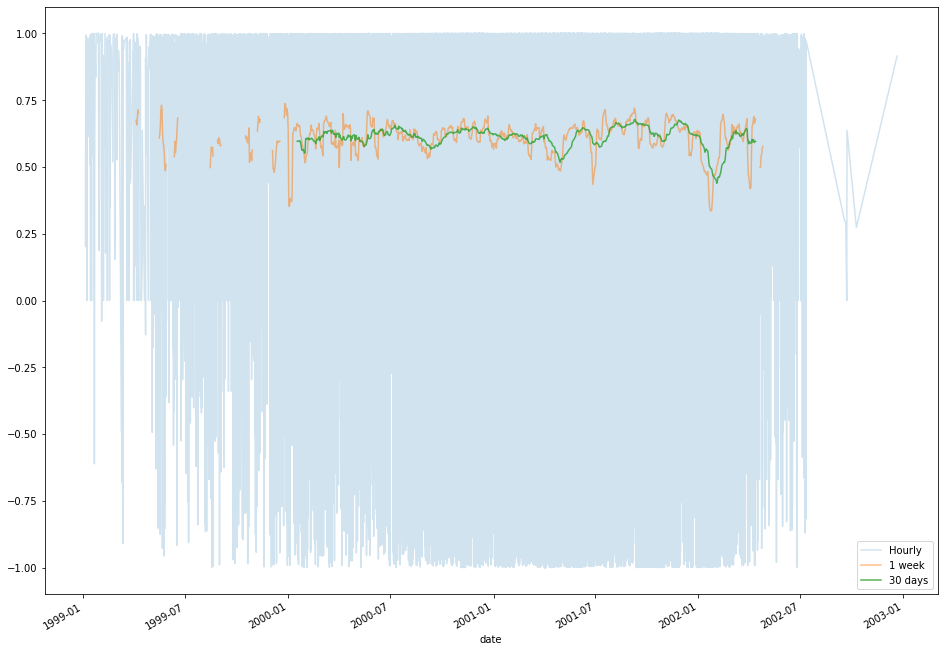

In [108]:
# moving averages
plt.figure(figsize = (16, 12))
y.plot(alpha = .2, label = 'Hourly')
y.resample('D').mean().rolling(7).mean().plot(alpha = .5, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha = .8, label='30 days')
plt.legend()

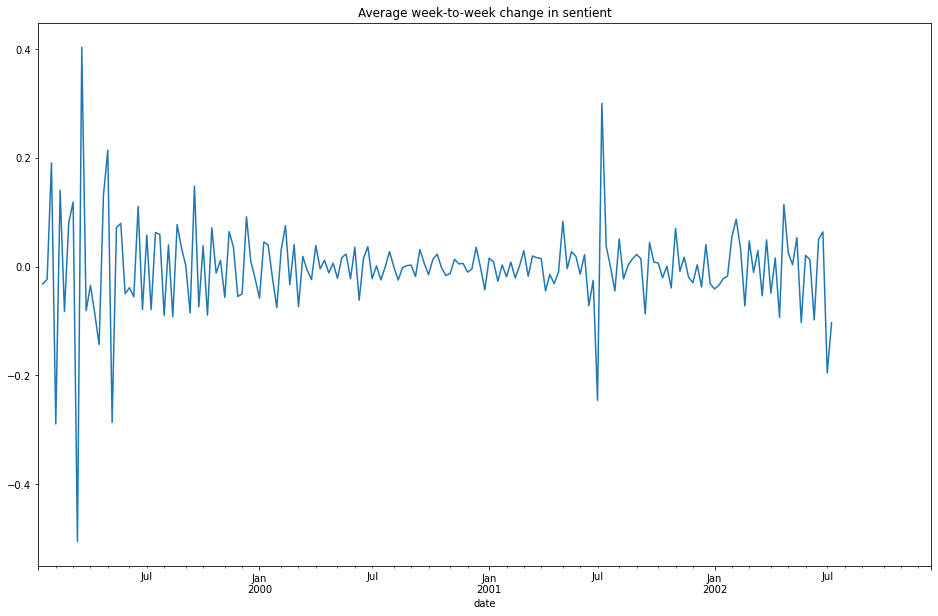

In [114]:
plt.figure(figsize =(16,10))
y.resample('W').mean().diff().plot(title='Average week-to-week change in sentient');

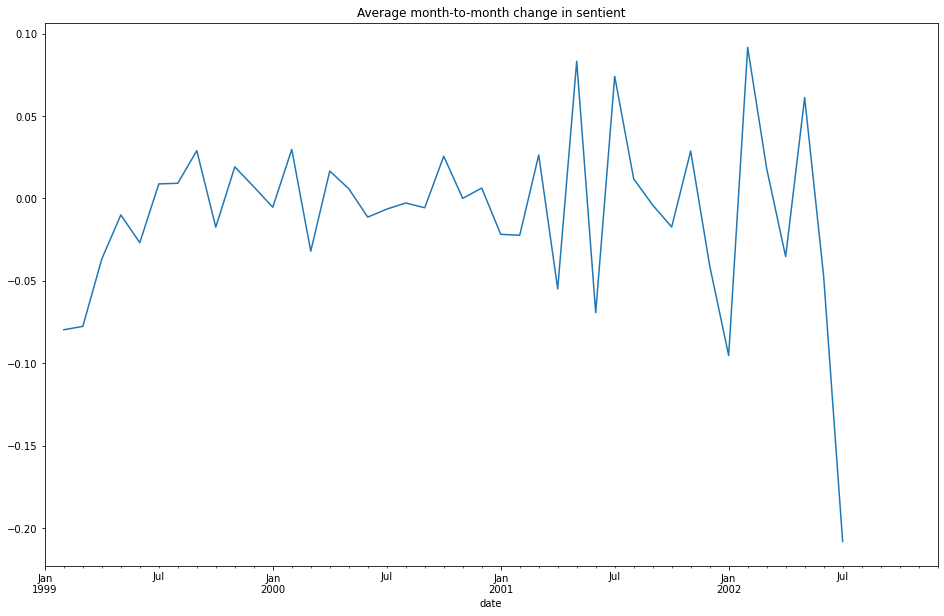

In [115]:
plt.figure(figsize =(16,10))
y.resample('M').mean().diff().plot(title='Average month-to-month change in sentient');

#### We see a big dip in july, there is a large spikes between 2001 and till the end of 2002 as well, so maybe aorund there we can see something of value?

# Season Plot

<AxesSubplot:xlabel='date'>

<Figure size 1152x720 with 0 Axes>

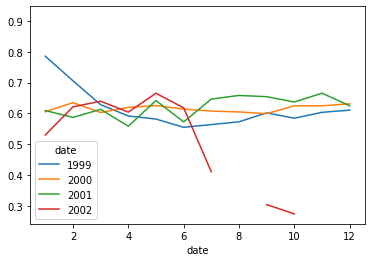

In [116]:
# unstack is similar to pivot_table. It turns an index level into columns
plt.figure(figsize =(16,10))
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

In [117]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1999,0.785308,0.705656,0.628070,0.591366,0.581352,0.554522,0.563330,0.572511,0.601494,0.584062,0.603207,0.610281
2000,0.604937,0.634642,0.602628,0.619226,0.625101,0.613768,0.607283,0.604511,0.598856,0.624442,0.624456,0.630757
2001,0.608990,0.586660,0.612978,0.558130,0.641365,0.572097,0.646160,0.658042,0.654002,0.636674,0.665434,0.624647
2002,0.529409,0.621060,0.639222,0.603952,0.665129,0.617930,0.409870,NaN,0.303483,0.273200,NaN,0.915300


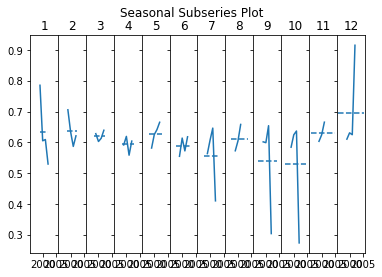

In [123]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### Make graph bigger but here we see that drop in july and sept and oct!

# ----------------------------------------------------------------------------
# ----------------------------------------------------------------------------

# Lets Look at that missing period between july and december in 2002

In [127]:
df[(df.index.year == 2002) & (df.index.month == 9)]

,sentiment,year,month,day
date,,,,
2002-09-19 00:34:42+00:00,0.2960,2002,9,19
2002-09-19 00:35:11+00:00,0.2960,2002,9,19
2002-09-19 19:59:09+00:00,0.2960,2002,9,19
2002-09-20 22:04:12+00:00,0.2960,2002,9,20
2002-09-22 16:42:25+00:00,0.0000,2002,9,22
2002-09-23 04:01:33+00:00,0.6369,2002,9,23


In [128]:
df[(df.index.year == 2002) & (df.index.month == 8)]

,sentiment,year,month,day
date,,,,


In [129]:
df[(df.index.year == 2002) & (df.index.month == 10)]

,sentiment,year,month,day
date,,,,
2002-10-09 21:20:21+00:00,0.2732,2002,10,9


In [130]:
df[(df.index.year == 2002) & (df.index.month == 11)]

,sentiment,year,month,day
date,,,,
